Accuracy: 100.00%


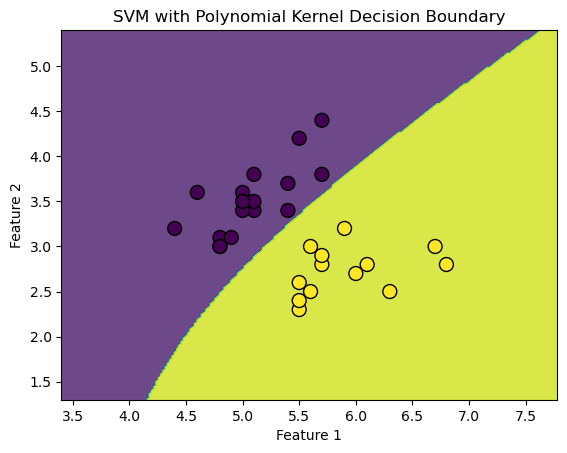

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Taking only the first two features for visualization
y = iris.target

# Binarize the output to make it a binary classification problem (Class 0 and Class 1)
X = X[y != 2]
y = y[y != 2]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train an SVM with a polynomial kernel
model = SVC(kernel='poly', degree=3, C=1.0)  # Degree 3 polynomial kernel
model.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = model.predict(X_test)

# Compute the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Plot decision boundaries
def plot_decision_boundary(X, y, model):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=100)
    plt.title('SVM with Polynomial Kernel Decision Boundary')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

plot_decision_boundary(X_test, y_test, model)


In [2]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
import joblib  # For saving the trained model

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Preprocess the data: Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create an instance of the SVC classifier
svc = SVC(kernel='rbf')  # RBF kernel for non-linear data

# Train the classifier on the training data
svc.fit(X_train, y_train)

# Use the trained classifier to predict the labels of the testing data
y_pred = svc.predict(X_test)

# Evaluate the performance of the classifier
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print(classification_report(y_test, y_pred))

# Tune hyperparameters using GridSearchCV
param_grid = {'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)
grid.fit(X_train, y_train)

# Best parameters from GridSearchCV
print(f"Best Parameters: {grid.best_params_}")

# Train the tuned classifier on the entire dataset
best_model = grid.best_estimator_
best_model.fit(X_train, y_train)

# Save the trained classifier for future use
joblib.dump(best_model, 'svm_model.pkl')

# Load the saved model
# loaded_model = joblib.load('svm_model.pkl')


Accuracy: 100.00%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kerne

['svm_model.pkl']

### Q1. What is the relationship between polynomial functions and kernel functions in machine learning algorithms?

In machine learning, **polynomial functions** are used in kernel functions to transform data into higher-dimensional space where a linear decision boundary can be found, even if the data is not linearly separable in the original space. This is part of the **kernel trick** in SVMs (Support Vector Machines).

The **polynomial kernel** function computes the similarity between two input vectors based on a polynomial transformation. The polynomial kernel is defined as:

\[
K(x, y) = (x \cdot y + c)^d
\]

Where:
- \( x \) and \( y \) are the input vectors.
- \( c \) is a free parameter that controls the influence of higher-order versus lower-order terms.
- \( d \) is the degree of the polynomial.

The polynomial kernel allows the SVM to model complex, non-linear relationships between features by implicitly mapping the input data to a higher-dimensional space. This kernel is particularly useful when there is an interaction between features that is best captured by polynomial combinations.

### Q2. How can we implement an SVM with a polynomial kernel in Python using Scikit-learn?

Here’s an example of how to implement an SVM with a polynomial kernel using Scikit-learn:

```python
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Taking only the first two features for visualization
y = iris.target

# Binarize the output to make it a binary classification problem (Class 0 and Class 1)
X = X[y != 2]
y = y[y != 2]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train an SVM with a polynomial kernel
model = SVC(kernel='poly', degree=3, C=1.0)  # Degree 3 polynomial kernel
model.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = model.predict(X_test)

# Compute the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Plot decision boundaries
def plot_decision_boundary(X, y, model):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=100)
    plt.title('SVM with Polynomial Kernel Decision Boundary')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

plot_decision_boundary(X_test, y_test, model)
```

### Q3. How does increasing the value of epsilon affect the number of support vectors in SVR?

In **Support Vector Regression (SVR)**, the **epsilon (ε)** parameter defines a margin of tolerance where no penalty is given to errors. It essentially creates a tube around the regression line within which predictions are not penalized. 

When **epsilon increases**, the tolerance for error increases, meaning that more data points will lie within the epsilon tube. Consequently:
- Fewer support vectors are needed since fewer data points lie outside the epsilon tube and contribute to the margin calculation.
- If **epsilon** is too large, the model becomes too lenient and might underfit the data.

In contrast, a smaller epsilon will reduce the tube size, leading to more support vectors and potentially a more sensitive model.

### Q4. How does the choice of kernel function, C parameter, epsilon parameter, and gamma parameter affect the performance of Support Vector Regression (SVR)?

1. **Kernel Function**:
   - The choice of the kernel function determines how the input data is mapped into higher-dimensional space. Common choices are:
     - **Linear kernel**: Useful when the data is linearly separable or close to it.
     - **Polynomial or RBF (Radial Basis Function) kernel**: Useful for non-linear relationships in the data.
     - For highly complex datasets, the RBF kernel is often the most effective, while for simpler relationships, a linear kernel might be sufficient.

2. **C Parameter**:
   - **C** controls the trade-off between a smooth decision boundary and classifying the training points correctly.
   - A **high C** means the model tries to classify every point correctly (low bias, high variance).
   - A **low C** allows for some misclassifications, but with a wider margin (high bias, low variance).

3. **Epsilon Parameter (ε)**:
   - **Epsilon** defines the width of the margin of tolerance in SVR. Predictions within this margin do not incur a loss.
   - **Increasing epsilon** leads to a larger margin where no penalty is applied, which may result in fewer support vectors and a simpler model.
   - **Decreasing epsilon** creates a more sensitive model but may overfit the data.

4. **Gamma Parameter (γ)**:
   - **Gamma** determines the influence of a single training example on the decision boundary.
   - A **high gamma** means that every point has a short-range impact, leading to a more complex model that might overfit the data.
   - A **low gamma** means that points have a long-range influence, leading to a smoother decision boundary.

**Examples**:
- If you have noisy data, you might want to **increase epsilon** to make the model less sensitive to minor errors.
- For non-linear patterns, **increase gamma** or switch to an RBF kernel.
- If the model is overfitting, you might want to **decrease C** to allow for a wider margin.

### Q5. Assignment: SVC Classifier Implementation with Hyperparameter Tuning

Here’s how to implement the assignment using Scikit-learn with the Iris dataset:

```python
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
import joblib  # For saving the trained model

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Preprocess the data: Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create an instance of the SVC classifier
svc = SVC(kernel='rbf')  # RBF kernel for non-linear data

# Train the classifier on the training data
svc.fit(X_train, y_train)

# Use the trained classifier to predict the labels of the testing data
y_pred = svc.predict(X_test)

# Evaluate the performance of the classifier
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print(classification_report(y_test, y_pred))

# Tune hyperparameters using GridSearchCV
param_grid = {'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)
grid.fit(X_train, y_train)

# Best parameters from GridSearchCV
print(f"Best Parameters: {grid.best_params_}")

# Train the tuned classifier on the entire dataset
best_model = grid.best_estimator_
best_model.fit(X_train, y_train)

# Save the trained classifier for future use
joblib.dump(best_model, 'svm_model.pkl')

# Load the saved model
# loaded_model = joblib.load('svm_model.pkl')
```

### Steps in the Assignment:

1. **Data Preprocessing**: The dataset is scaled using `StandardScaler` for better performance of SVM.
2. **Model Training**: SVM classifier is trained using the RBF kernel.
3. **Evaluation**: Model accuracy and classification report are printed.
4. **Hyperparameter Tuning**: GridSearchCV is used to tune the `C` and `gamma` parameters.
5. **Model Saving**: The tuned model is saved using `joblib` for future use.

You can experiment with different datasets and evaluation metrics such as precision, recall, and F1-score based on the classification problem.